<h1 align='center' style="color: blue;">PROJECT ON MOVIE GENRE PREDICTION</h1>

The task involves developing a predictive model to determine whether a movie falls into the <b><i>Drama</i></b> genre or not. To achieve this goal, the textual features extracted from movie narratives will be used to create predictive models. This project comprises three distinct files:

<ol>
    <li><b>movie_story_file.csv</b>: This file encompasses the movie narratives, which will serve as the foundation for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: Following the development of predictive models and the selection of the most optimal model, this file comes into play. It is employed to apply the best predictive model and ascertain whether the movies listed in <b>movie story evaluation file.csv</b> belong to the Drama genre.</li>
    <li><b>movies.csv</b>: This file contains information pertaining to various movie genres.</li>
</ol>

In [1]:
conda install -c conda-forge rise

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


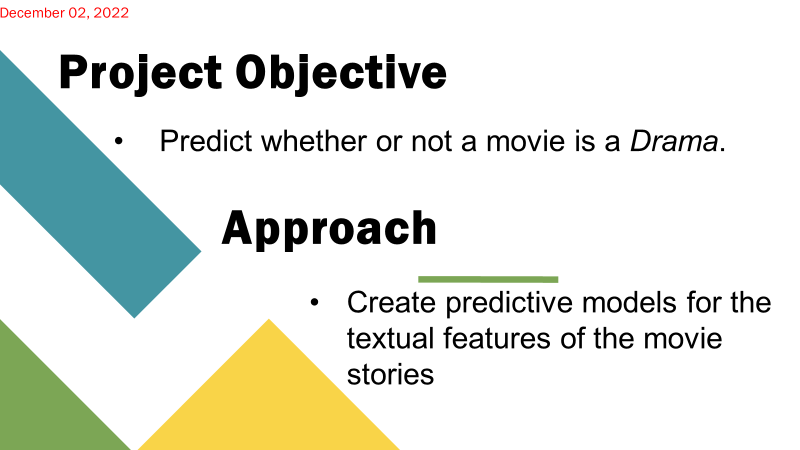

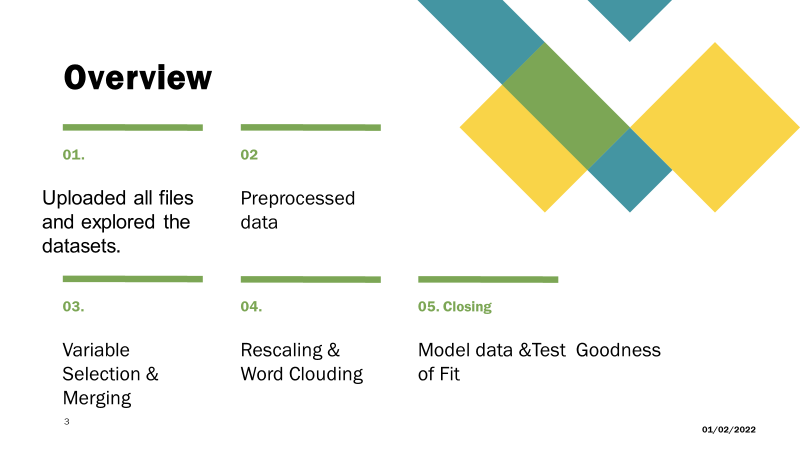

# **Step 1 & 2**

# **Explored data for familiarity. Carried out preliminary preprocessing and created a word cloud for text visualization.** 

In [2]:
# import the data

import pandas as pd
import numpy as np

movie_plot = pd.read_csv('movie_story_file.csv')

movies = pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,27509,Carolina (2005),Comedy|Romance
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller
3,27821,"Interpreter, The (2005)",Drama|Thriller
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller
...,...,...,...
23493,209051,Jeff Garlin: Our Man in Chicago (2019),(no genres listed)
23494,209085,The Mistletoe Secret (2019),Romance
23495,209133,The Riot and the Dance (2018),(no genres listed)
23496,209157,We (2018),Drama


### **Data Merging**

In [3]:

movie_genre = pd.merge(movie_plot, movies, left_on='movie_id',right_on='movieId',how='inner').drop(['movieId','title'], axis=1)

movie_genre.head()  

,movie_id,story,genres
0,131072,A girl who always tends to fall in love with t...,Comedy
1,196609,"Bigfoot has come to the town of Ellwood City, ...",Comedy|Horror
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",Documentary
3,196611,"In her first special since 2003, Ellen revisit...",Comedy
4,196613,Mike and Sulley are back at Monsters Universit...,Animation|Children|Comedy|Fantasy


### **Rescaling , Bagging & Visualization**

In [4]:
# Use the TFID methodology the scale the words in the story as part of exporing process

from sklearn.feature_extraction.text import TfidfVectorizer 
import numpy as np
vect = TfidfVectorizer(stop_words='english',lowercase=False, min_df=10)
vect.fit(movie_genre.story)
X= len(vect.vocabulary_)


In [5]:
# Create bag of words and transform into matrix

bag_of_words= vect.transform(movie_genre.story)
bag_of_words

word_matrix= pd.DataFrame(bag_of_words.toarray(),columns=vect.get_feature_names_out())
word_matrix

,000,10,100,11,12,13,13th,14,15,150,...,youngsters,youth,youthful,youths,zero,zombie,zombies,zone,zones,zoo
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.193259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158309,0.0,0.0
19996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
19997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
19998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


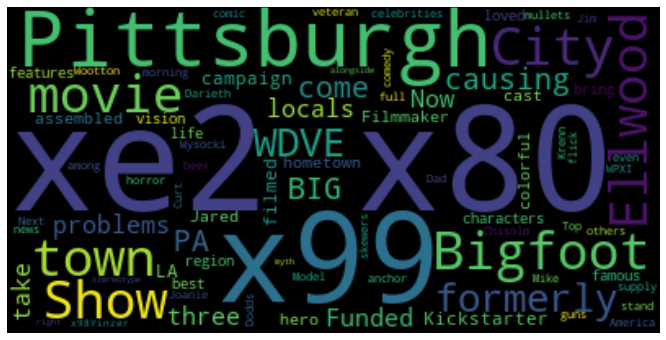

In [6]:
# Create WordClouds to visualize prominenet words in the dataset {1}
from wordcloud import WordCloud
import matplotlib.pyplot as plt

main_dataset = movie_genre
# Create a WordCloud object
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white") 
wordcloud = WordCloud().generate(main_dataset.story[1]) 
# Adjust the figure size
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off");

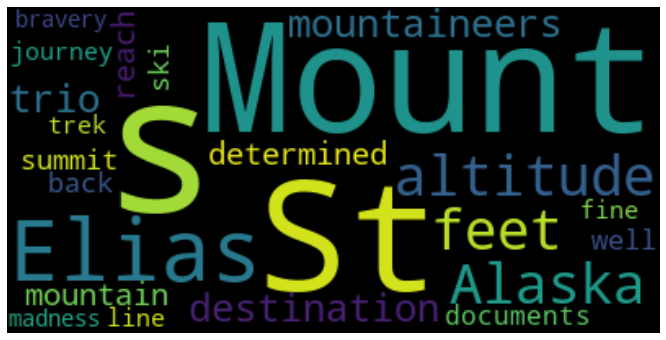

In [7]:
# Create WordClouds to visualize prominenet words in the dataset {2}
from os import path
from PIL import Image 
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt 
%matplotlib inline

wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white") 
wordcloud = WordCloud().generate(main_dataset.story[2]) 
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off");

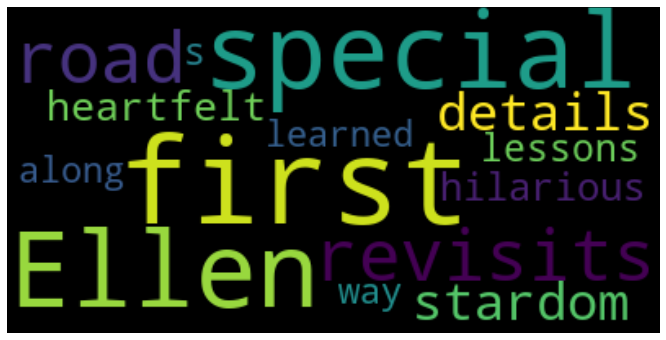

In [8]:
# Create WordClouds to visualize prominenet words in the dataset {3}

wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white") 
wordcloud = WordCloud().generate(main_dataset.story[3]) 
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off");

## **Data cleaning**

In [9]:
#cleaning the data

def clean_data(df):
    #dropping rows having null genres
    temp = df[df.genres!= '(no genres listed)']
    #dropping rows having no plot
    temp = temp.dropna()
    temp= temp.reset_index()
    temp.drop(['index'], axis=1, inplace = True)
    temp['story']= temp['story'].str.lower()
    return temp

final_temp= clean_data(movie_genre)
final_temp

,movie_id,story,genres
0,131072,a girl who always tends to fall in love with t...,Comedy
1,196609,"bigfoot has come to the town of ellwood city, ...",Comedy|Horror
2,131074,"at an altitude of 18,000 feet, alaska\'s mount...",Documentary
3,196611,"in her first special since 2003, ellen revisit...",Comedy
4,196613,mike and sulley are back at monsters universit...,Animation|Children|Comedy|Fantasy
...,...,...,...
18881,56801,the iconic creatures from two of the scariest ...,Action|Horror|Sci-Fi
18882,122337,when a bored-with-life english teacher meets a...,Drama|Romance
18883,187875,herbert blount is a crowdfunding contributor f...,Horror
18884,187873,real boy is the coming-of-age story of bennett...,Documentary


# **Developed dataframe containing three columns_  movieId, story, & DramaGenre with the value for the third column in a binary format** 

## **Step 2 Output**

In [10]:
is_drama =[]
for row in final_temp['genres']:
    if "Drama" in row:
        is_drama.append(1)
    else:
        is_drama.append(0)
final_temp['DramaGenre'] = is_drama
final_temp.drop(['genres'], axis=1, inplace= True)
main_dataset = final_temp

main_dataset

,movie_id,story,DramaGenre
0,131072,a girl who always tends to fall in love with t...,0
1,196609,"bigfoot has come to the town of ellwood city, ...",0
2,131074,"at an altitude of 18,000 feet, alaska\'s mount...",0
3,196611,"in her first special since 2003, ellen revisit...",0
4,196613,mike and sulley are back at monsters universit...,0
...,...,...,...
18881,56801,the iconic creatures from two of the scariest ...,0
18882,122337,when a bored-with-life english teacher meets a...,1
18883,187875,herbert blount is a crowdfunding contributor f...,0
18884,187873,real boy is the coming-of-age story of bennett...,0


## **Step 3.**

# **Prepared data for modeling :  confirmed shape, counted the values, check for missing data, and lemmatized**

In [11]:
main_dataset.head()

,movie_id,story,DramaGenre
0,131072,a girl who always tends to fall in love with t...,0
1,196609,"bigfoot has come to the town of ellwood city, ...",0
2,131074,"at an altitude of 18,000 feet, alaska\'s mount...",0
3,196611,"in her first special since 2003, ellen revisit...",0
4,196613,mike and sulley are back at monsters universit...,0


In [12]:
main_dataset.shape

(18886, 3)

In [13]:
# check the value counts of our target variable
main_dataset["DramaGenre"].value_counts()

0    10474
1     8412
Name: DramaGenre, dtype: int64

We see that our dataset is balanced.

In [14]:
# check for missing
main_dataset.isna().sum()

movie_id      0
story         0
DramaGenre    0
dtype: int64

In [15]:
# check duplicates
main_dataset.duplicated().sum()

0

Preprocess the text data column.

In [16]:

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() # initialize lemmatizer

preprocessed_list = []

for row in main_dataset["story"]:
    cleaned_row = re.sub('[^A-Za-z0-9]+', ' ', str(row)) # taking only words
    std_row = cleaned_row.lower() # standardizing
    tokenized_row = word_tokenize(std_row) # words tokenized
    filtered_review = [word for word in tokenized_row if word not in stop_words] # removing stop words (List comprehension)
    lemm_review = " ".join([lemmatizer.lemmatize(word) for word in filtered_review]) # lemmatizing

    preprocessed_list.append(lemm_review)

## **step 4.**

# **Partioned the data into train and test and applied predictive models**



Train test split (85:15 Ratio respectively)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocessed_list, main_dataset['DramaGenre'], test_size=0.15, random_state=0)

Using TF-IDF Embedding for feature extraction.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
X_train_embedding = tfidf_vec.fit_transform(X_train) # fit on training set
X_test_embedding = tfidf_vec.transform(X_test) # transform testing set

Model Building

In [19]:
# function to get metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def get_metrics(true, pred, model_name):
    f1_macro = f1_score(true, pred, average="macro")
    acc_score = accuracy_score(true, pred)
    prec_score = precision_score(true, pred)
    rec_score = recall_score(true, pred)
    print(f"\n###--- {model_name} ---###\n### F1-Score(Macro): {round(f1_macro*100, 1)}% ###")
    print(classification_report(true, pred))
    sns.heatmap(confusion_matrix(true, pred), annot=True, fmt=".0f", cmap="Blues")
    plt.show()
    return [round(f1_macro*100, 1), round(acc_score*100, 1), round(prec_score*100, 1), round(rec_score*100, 1)]

In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
# initialize all models to test

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

models_dict = {
    "Logistic Regression" : LogisticRegression(random_state=0, max_iter=1000),
    "Random Forest" : RandomForestClassifier(n_jobs=-1, random_state=0),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=0),
    "AdaBoost" : AdaBoostClassifier(random_state=0),
    "C-Support Vector" : SVC(random_state=0),
    "Decision Tree" : DecisionTreeClassifier(random_state=0),
    "K-Neigbors" : KNeighborsClassifier(n_jobs=-1),
    "Multinomial Naive Bayes" : MultinomialNB(),
    "XGB Classifier" : XGBClassifier()
}

In [22]:
# function to evaluate models
import time
def eval_models():
    models_df = pd.DataFrame(columns=["Model", 'Accuracy', "Precision", "Recall", "F1-Score(Macro)", "Time Taken"])
    index = 0
    for clf_name, model in models_dict.items():
        start_time = time.time()
        model.fit(X_train_embedding, y_train)
        y_pred = model.predict(X_test_embedding)
        time_taken = time.time() - start_time
        f1_macro, acc, prec, rec_score = get_metrics(y_test, y_pred, clf_name)
        to_push = (clf_name, acc, prec, rec_score, f1_macro, time_taken)
        models_df.loc[index] = to_push
        index += 1
    return models_df


###--- Logistic Regression ---###
### F1-Score(Macro): 69.0% ###
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1572
           1       0.68      0.61      0.64      1261

    accuracy                           0.70      2833
   macro avg       0.69      0.69      0.69      2833
weighted avg       0.70      0.70      0.70      2833



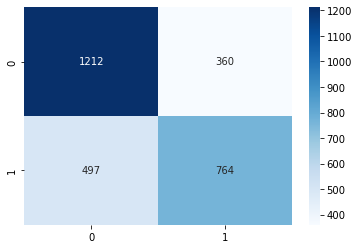


###--- Random Forest ---###
### F1-Score(Macro): 67.7% ###
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1572
           1       0.66      0.60      0.63      1261

    accuracy                           0.68      2833
   macro avg       0.68      0.68      0.68      2833
weighted avg       0.68      0.68      0.68      2833



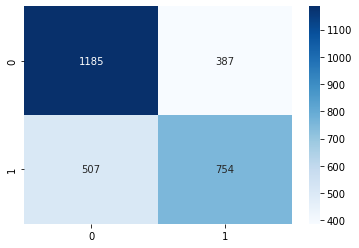


###--- Gradient Boosting ---###
### F1-Score(Macro): 62.5% ###
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1572
           1       0.65      0.45      0.53      1261

    accuracy                           0.65      2833
   macro avg       0.65      0.63      0.62      2833
weighted avg       0.65      0.65      0.64      2833



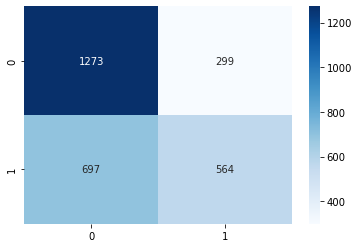


###--- AdaBoost ---###
### F1-Score(Macro): 64.0% ###
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1572
           1       0.61      0.57      0.59      1261

    accuracy                           0.65      2833
   macro avg       0.64      0.64      0.64      2833
weighted avg       0.65      0.65      0.65      2833



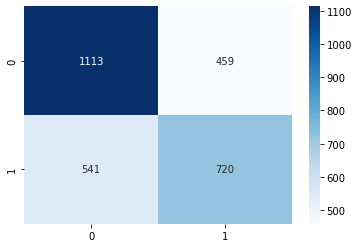


###--- C-Support Vector ---###
### F1-Score(Macro): 68.7% ###
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1572
           1       0.68      0.60      0.64      1261

    accuracy                           0.70      2833
   macro avg       0.69      0.69      0.69      2833
weighted avg       0.69      0.70      0.69      2833



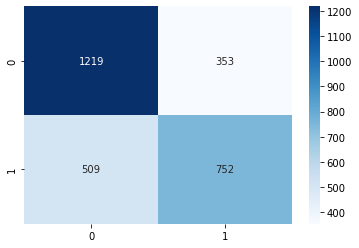


###--- Decision Tree ---###
### F1-Score(Macro): 59.7% ###
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      1572
           1       0.55      0.56      0.56      1261

    accuracy                           0.60      2833
   macro avg       0.60      0.60      0.60      2833
weighted avg       0.60      0.60      0.60      2833



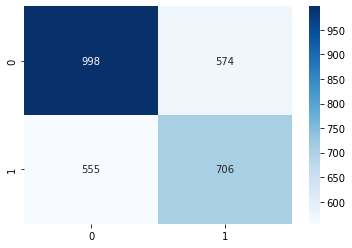


###--- K-Neigbors ---###
### F1-Score(Macro): 60.8% ###
              precision    recall  f1-score   support

           0       0.65      0.69      0.66      1572
           1       0.57      0.53      0.55      1261

    accuracy                           0.62      2833
   macro avg       0.61      0.61      0.61      2833
weighted avg       0.61      0.62      0.61      2833



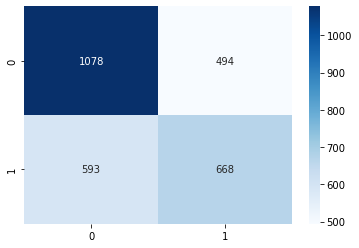


###--- Multinomial Naive Bayes ---###
### F1-Score(Macro): 64.2% ###
              precision    recall  f1-score   support

           0       0.65      0.88      0.75      1572
           1       0.74      0.42      0.53      1261

    accuracy                           0.67      2833
   macro avg       0.70      0.65      0.64      2833
weighted avg       0.69      0.67      0.65      2833



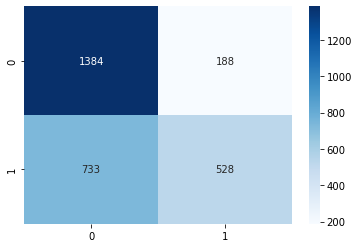


###--- XGB Classifier ---###
### F1-Score(Macro): 67.2% ###
              precision    recall  f1-score   support

           0       0.69      0.76      0.73      1572
           1       0.66      0.58      0.62      1261

    accuracy                           0.68      2833
   macro avg       0.68      0.67      0.67      2833
weighted avg       0.68      0.68      0.68      2833



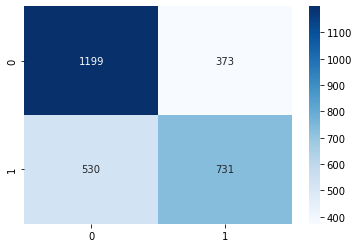

In [23]:
evaluate_models_df = eval_models()

# **Model Performance Summary**

### **A total of 9 models were applied**

### **data was split to 85% trained and 15%test**

### **Logistic model appeared to be the best model with the higest accuracy, precision and recall.**

### **Model Performance Summary**

In [24]:
evaluate_models_df.sort_values('Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score(Macro),Time Taken
0,Logistic Regression,69.7,68.0,60.6,69.0,0.437978
4,C-Support Vector,69.6,68.1,59.6,68.7,107.238938
1,Random Forest,68.4,66.1,59.8,67.7,3.288902
8,XGB Classifier,68.1,66.2,58.0,67.2,6.500647
7,Multinomial Naive Bayes,67.5,73.7,41.9,64.2,0.008028
2,Gradient Boosting,64.8,65.4,44.7,62.5,9.758882
3,AdaBoost,64.7,61.1,57.1,64.0,2.050271
6,K-Neigbors,61.6,57.5,53.0,60.8,0.978726
5,Decision Tree,60.1,55.2,56.0,59.7,6.041734


We see that Logistic Regression is our best model based on Accuracy.

## **Step 5.**

# **Choosing the best model and using the full data available in main dataset to train that model.**



Fit TF-IDF Embedding on the full dataset.

In [25]:
X_embedding = tfidf_vec.fit_transform(preprocessed_list)
y = main_dataset['DramaGenre']

Train Logistic Regression

In [26]:
lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_embedding, y)

LogisticRegression(max_iter=1000, random_state=0)

## **Step 6**

# **Replicated Step 2 in the movie_story_evaluation_file**

Prepare evaluation dataset.

In [27]:
evaluation_movies = pd.read_csv('movie_story_evaluation_file.csv')

## **Performing the activities below:**
   
   ## **data merging**
   ## **cleaning &**
   ## **binary representation of genres for Movie_Evaluation**

In [28]:
movie_genre = pd.merge(evaluation_movies, movies, left_on='movie_id',right_on='movieId',how='inner').drop(['movieId','title'], axis=1)

movie_genre.head()  

,movie_id,story,genres
0,122349,Growing up in the Mission district of San Fran...,Drama
1,122351,A soldier returns home from the Iraq war only ...,Horror|Thriller
2,122361,Marco the Monkey works as a beach officer. But...,Animation|Children|Comedy
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Action|Romance
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Action|Drama|Romance


In [29]:
final_temp = clean_data(movie_genre)

In [30]:
is_drama =[]
for row in final_temp['genres']:
    if "Drama" in row:
        is_drama.append(1)
    else:
        is_drama.append(0)
final_temp['DramaGenre'] = is_drama
final_temp.drop(['genres'], axis=1, inplace= True)
evaluation_dataset = final_temp

evaluation_dataset

,movie_id,story,DramaGenre
0,122349,growing up in the mission district of san fran...,1
1,122351,a soldier returns home from the iraq war only ...,0
2,122361,marco the monkey works as a beach officer. but...,0
3,187901,"when an honest cop, vijay kumar\'s family is r...",0
4,187903,"kathiresan aka kaththi, a criminal, escapes fr...",1
...,...,...,...
3297,131062,"in the middle of nowhere, 20 years after an ap...",1
3298,131064,after living for years as a struggling artist ...,0
3299,131066,ronal is a young barbarian with low self-estee...,0
3300,131068,"ziege, h\xc3\xa4schen and max have now moved t...",0


## **Step 7.**

# **Applied best model in step 5 (Logistic Regression) to predict movies in evaluation_dataset.**

Preprocess textual column.

In [31]:
preprocessed_list = []

for row in evaluation_dataset["story"]:
    cleaned_row = re.sub('[^A-Za-z0-9]+', ' ', str(row)) # taking only words
    std_row = cleaned_row.lower() # standardizing
    tokenized_row = word_tokenize(std_row) # words tokenized
    filtered_review = [word for word in tokenized_row if word not in stop_words] # removing stop words (List comprehension)
    lemm_review = " ".join([lemmatizer.lemmatize(word) for word in filtered_review]) # lemmatizing

    preprocessed_list.append(lemm_review)

Get TF-IDF transformations of evaluation dataset.

In [32]:
evaluation_embeddings = tfidf_vec.transform(preprocessed_list)

## **Get predictions using Logistic Regression**.

In [33]:
y_pred = lr_model.predict(evaluation_embeddings)

## **Step 8.**

# **Report the final accuracy, precision, recall and F1 score.**

Get the metrics.

In [34]:
accuracy = accuracy_score(evaluation_dataset['DramaGenre'], y_pred)
precision = precision_score(evaluation_dataset['DramaGenre'], y_pred)
recall = recall_score(evaluation_dataset['DramaGenre'], y_pred)
f1_eval = f1_score(evaluation_dataset['DramaGenre'], y_pred)

Reporting Metrics.

In [35]:
print("Accuracy:", accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_eval)

Accuracy: 0.7132041187159297
Precision: 0.6760355029585798
Recall: 0.6423049894588897
F1 Score: 0.6587387387387388


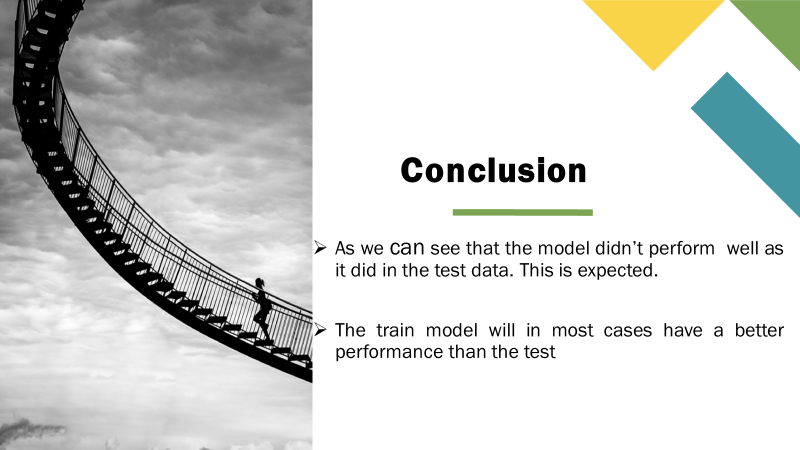